In [1]:
import tensorflow as tf
print(tf.__version__)

2.3.1


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Conv1D, MaxPooling1D,Embedding
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.models import Model

In [4]:
# Getting Data
data = pd.read_csv('spam.csv', encoding = "ISO-8859-1")

In [5]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
# Dr0op unnecessary columns
data = data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

In [7]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
data.columns = ['labels', 'data']

In [9]:
data.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
# Create binary label variables 
data['b_labels'] = data['labels'].map({'ham': 0, 'spam': 1})
Y = data['b_labels'].values

In [11]:
data.head()

,labels,data,b_labels
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [12]:
# Split the data
df_train, df_test, Ytrain, Ytest = train_test_split(data['data'], Y, test_size=0.33)

In [13]:
# Convert sentences to sequences
MAX_VOCAB_SIZE = 20000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df_train)
sequences_train = tokenizer.texts_to_sequences(df_train)
sequences_test = tokenizer.texts_to_sequences(df_test)

In [14]:
word2idx = tokenizer.word_index
V = len(word2idx)
print(V, "Unique Tokens Founds")

7227 Unique Tokens Founds


In [15]:
# Pad sequences so that we can get N x T matrix
data_train = pad_sequences(sequences_train)
data_train.shape

(3733, 162)

In [16]:
# Sequence length
T = data_train.shape[1]

In [17]:
data_test = pad_sequences(sequences_test, maxlen=T)
data_test.shape

(1839, 162)

In [18]:
# Create the model
# Embedding dimensionality
D = 20

# Hidden State D
M = 15

i = Input(shape=(T,))
x = Embedding(V + 1, D)(i)
x = Conv1D(32, 3, activation='relu')(x)
x = MaxPooling1D(3)(x)
x = Conv1D(64, 3, activation='relu')(x)
x = MaxPooling1D(3)(x)
x = Conv1D(128, 3, activation='relu')(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(i, x)

In [22]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 162)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 162, 20)           144560    
_________________________________________________________________
conv1d (Conv1D)              (None, 160, 32)           1952      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 53, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 51, 64)            6208      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 17, 64)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 15, 128)          

In [19]:
# Compile and fit
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

hist = model.fit(
    data_train,
    Ytrain,
    epochs=10,
    validation_data=(data_test, Ytest)
)

Epoch 1/10
117/117 [==============================] - 3s 21ms/step - loss: 0.3912 - accuracy: 0.8591 - val_loss: 0.2853 - val_accuracy: 0.8668
Epoch 2/10
117/117 [==============================] - 2s 18ms/step - loss: 0.1313 - accuracy: 0.9424 - val_loss: 0.1000 - val_accuracy: 0.9647
Epoch 3/10
117/117 [==============================] - 2s 19ms/step - loss: 0.0170 - accuracy: 0.9962 - val_loss: 0.1027 - val_accuracy: 0.9799
Epoch 4/10
117/117 [==============================] - 2s 21ms/step - loss: 0.0040 - accuracy: 0.9995 - val_loss: 0.1099 - val_accuracy: 0.9821
Epoch 5/10
117/117 [==============================] - 3s 22ms/step - loss: 0.0021 - accuracy: 0.9997 - val_loss: 0.1256 - val_accuracy: 0.9810
Epoch 6/10
117/117 [==============================] - 2s 21ms/step - loss: 0.0015 - accuracy: 0.9997 - val_loss: 0.1327 - val_accuracy: 0.9821
Epoch 7/10
117/117 [==============================] - 2s 20ms/step - loss: 8.6525e-04 - accuracy: 0.9997 - val_loss: 0.1116 - val_accuracy: 0.

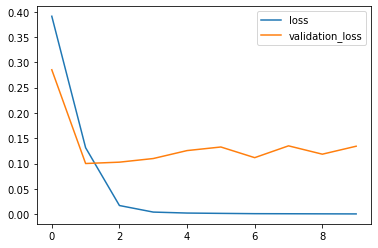

In [20]:
# plot loss per iteration
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='validation_loss')
plt.legend()

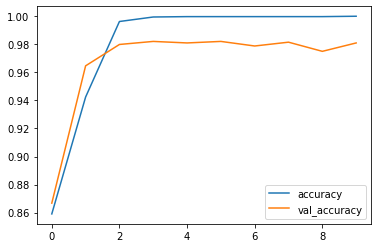

In [21]:
# Plot accuracy per iteration
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [53]:
r = model.evaluate(data_test, Ytest)

58/58 [==============================] - 0s 5ms/step - loss: 0.1342 - accuracy: 0.9810


In [67]:
pred = model.predict(data_test)

In [68]:
pred = [0 if i < 0.5 else 1 for i in pred]
pred = np.array(pred)

In [76]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Ytest, pred)
# So we classified 1587 ham as ham and 217 spam as spam. 
# 28 spams were wrongly classified as ham
# 7 hams were wrongly classified as spam

array([[1587,    7],
       [  28,  217]])

In [87]:
# We might want to see which hams and spams were misclassified.
# Coping the index in a file
index_test_pred = df_test.index

2468    Lol well don't do it without me. We could have...
3512       Staff of placement training in Amrita college.
715               When i have stuff to sell i.ll tell you
4271                                  Where to get those?
1404           Actually getting ready to leave the house.
                              ...                        
5234                                Ok cool. See ya then.
1272                                                Ok...
5440        Thank you. do you generally date the brothas?
1819                Dunno dat's wat he told me. Ok lor...
398     Good evening Sir, Al Salam Wahleykkum.sharing ...
Name: data, Length: 1839, dtype: object

In [128]:
for i in range(0,1839):
    if(pred[i] != Ytest[i]):
        index = index_test_pred[i]
        print("Index:", index, "\n", "Data:", data.loc[index]['data'], "\n", "Label:", data.loc[index]['labels'], "\n")

Index: 1468 
 Data: Hi its LUCY Hubby at meetins all day Fri & I will B alone at hotel U fancy cumin over? Pls leave msg 2day 09099726395 Lucy x Callså£1/minMobsmoreLKPOBOX177HP51FL 
 Label: spam 

Index: 3358 
 Data: Sorry I missed your call let's talk when you have the time. I'm on 07090201529 
 Label: spam 

Index: 1429 
 Data: For sale - arsenal dartboard. Good condition but no doubles or trebles! 
 Label: spam 

Index: 4067 
 Data: TBS/PERSOLVO. been chasing us since Sept forå£38 definitely not paying now thanks to your information. We will ignore them. Kath. Manchester. 
 Label: spam 

Index: 1977 
 Data: Reply to win å£100 weekly! Where will the 2006 FIFA World Cup be held? Send STOP to 87239 to end service 
 Label: spam 

Index: 1059 
 Data: EASTENDERS TV Quiz. What FLOWER does DOT compare herself to? D= VIOLET E= TULIP F= LILY txt D E or F to 84025 NOW 4 chance 2 WIN å£100 Cash WKENT/150P16+ 
 Label: spam 

Index: 2698 
 Data: FROM 88066 LOST å£12 HELP 
 Label: spam 

Index: 5